In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('total_merge.csv')

In [3]:
timestep = 30

In [4]:
df['timestamp'] = pd.to_datetime(df['timestamp'])
df['Date'] = df['timestamp'].dt.date
df['hour'] = df['timestamp'].dt.hour
df['cnt'] = (df['timestamp'].dt.hour*60 + df['timestamp'].dt.minute)//timestep

In [5]:
df = df.groupby(['Date','cnt']).mean()
df = df.reset_index()

C:\Users\minseok\AppData\Local\Temp\ipykernel_24868\459440694.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df = df.groupby(['Date','cnt']).mean()


In [6]:
df = df[(df['hour']<=22) & (df['hour']>=8)]

In [7]:
df

,Date,cnt,1F_temp,2F_temp,3F_temp,4F_temp,5F_temp,E1_L1/A_demand,E6_L1/A_demand,E7_L1/A_demand,E8_L1/A_demand,E9_L1/A_demand,E10_L1/A_demand,TA,CA,instant_headcount,cumulative_headcount,hour
16,2023-03-23,16,18.949722,20.842722,22.518667,23.198333,24.317944,13.100000,61.633333,-59.800000,57.500000,0.000000,38.666667,12.745000,10.000000,0.000000,0.000000,8.0
17,2023-03-23,17,18.829167,21.365000,23.078278,23.754889,24.553444,-2.466667,56.533333,-56.033333,53.600000,0.000000,36.800000,13.045000,10.000000,0.000000,0.000000,8.0
18,2023-03-23,18,18.312944,21.550778,23.394111,24.092278,24.271722,-2.333333,43.433333,-55.733333,53.600000,-0.033333,36.700000,12.668333,10.000000,0.100000,1.077667,9.0
19,2023-03-23,19,18.146778,21.664778,23.578333,24.320778,24.138889,-2.333333,23.866667,-36.933333,54.700000,-0.033333,16.866667,11.568333,10.000000,0.933333,3.749667,9.0
20,2023-03-23,20,19.240222,22.169889,23.974111,24.645722,24.061778,35.466667,24.766667,-28.000000,56.166667,0.000000,-2.900000,10.927500,10.000000,1.433333,46.635667,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4985,2023-10-11,41,21.122444,22.668722,19.838667,23.125000,23.144444,2312.700000,913.066667,3527.533333,-4.500000,-4.700000,-0.066667,13.755000,1.741667,2.500000,115.760000,20.0
4986,2023-10-11,42,20.989833,22.797722,19.819667,23.125000,23.648611,2334.700000,858.033333,3646.266667,-5.033333,384.466667,-0.066667,13.479167,1.516667,2.200000,68.899000,21.0
4987,2023-10-11,43,21.012778,22.864556,19.830389,23.125000,23.567389,1547.266667,596.933333,1923.933333,29.400000,891.166667,35.966667,13.229167,0.516667,0.666667,47.229667,21.0
4988,2023-10-11,44,21.533833,22.974833,20.737056,23.125000,23.725167,-1.300000,25.466667,-1.500000,54.766667,-2.133333,35.333333,13.148333,0.725000,0.133333,8.499333,22.0


In [8]:
df = df[['4F_temp','TA','CA','instant_headcount','cumulative_headcount','cnt','E9_L1/A_demand']].reset_index(drop=True)

In [9]:
df

,4F_temp,TA,CA,instant_headcount,cumulative_headcount,cnt,E9_L1/A_demand
0,23.198333,12.745000,10.000000,0.000000,0.000000,16,0.000000
1,23.754889,13.045000,10.000000,0.000000,0.000000,17,0.000000
2,24.092278,12.668333,10.000000,0.100000,1.077667,18,-0.033333
3,24.320778,11.568333,10.000000,0.933333,3.749667,19,-0.033333
4,24.645722,10.927500,10.000000,1.433333,46.635667,20,0.000000
...,...,...,...,...,...,...,...
3115,23.125000,13.755000,1.741667,2.500000,115.760000,41,-4.700000
3116,23.125000,13.479167,1.516667,2.200000,68.899000,42,384.466667
3117,23.125000,13.229167,0.516667,0.666667,47.229667,43,891.166667
3118,23.125000,13.148333,0.725000,0.133333,8.499333,44,-2.133333


In [10]:
df['Y'] = df['4F_temp'].shift(-1)

In [11]:
df = df.dropna()

In [12]:
df

,4F_temp,TA,CA,instant_headcount,cumulative_headcount,cnt,E9_L1/A_demand,Y
0,23.198333,12.745000,10.000000,0.000000,0.000000,16,0.000000,23.754889
1,23.754889,13.045000,10.000000,0.000000,0.000000,17,0.000000,24.092278
2,24.092278,12.668333,10.000000,0.100000,1.077667,18,-0.033333,24.320778
3,24.320778,11.568333,10.000000,0.933333,3.749667,19,-0.033333,24.645722
4,24.645722,10.927500,10.000000,1.433333,46.635667,20,0.000000,24.958222
...,...,...,...,...,...,...,...,...
3114,23.125000,14.055000,1.241667,4.733333,108.473333,40,-5.000000,23.125000
3115,23.125000,13.755000,1.741667,2.500000,115.760000,41,-4.700000,23.125000
3116,23.125000,13.479167,1.516667,2.200000,68.899000,42,384.466667,23.125000
3117,23.125000,13.229167,0.516667,0.666667,47.229667,43,891.166667,23.125000


In [13]:
X = np.array(df.drop(['Y'],axis=1))
Y = np.array(df[['Y']])

In [14]:
from sklearn.linear_model import LinearRegression

In [15]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_squared_error, r2_score

In [16]:
train_x, test_x, train_y, test_y = train_test_split(X, Y, test_size=0.15, shuffle=True)
scaler_x = MinMaxScaler()
train_x = scaler_x.fit_transform(train_x)
test_x = scaler_x.transform(test_x)
scaler_y = MinMaxScaler()
train_y = scaler_y.fit_transform(train_y.reshape(-1,1))
test_y = scaler_y.transform(test_y.reshape(-1,1))
model = LinearRegression()
model.fit(train_x,train_y)
pred = model.predict(test_x)
pred = scaler_y.inverse_transform(pred)
real = scaler_y.inverse_transform(test_y)

In [17]:
import matplotlib.pyplot as plt

In [18]:
rmse = mean_squared_error(real,pred,squared=False)
cvrmse = rmse/np.average(real)

In [19]:
print(rmse)
print(cvrmse)

0.4794854073873236
0.021373426766888005


In [20]:
mape = mean_absolute_percentage_error(real,pred)

In [21]:
mape

0.013994911332500993

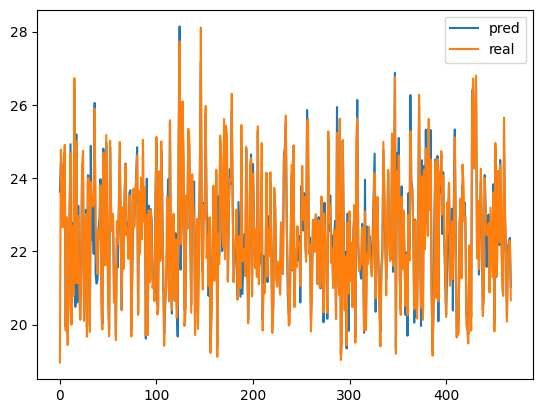

In [22]:
plt.plot(pred, label='pred')
plt.plot(real, label='real')
plt.legend()

In [23]:
min = np.min(real)
max = np.max(real)

Text(0, 0.5, 'pred')

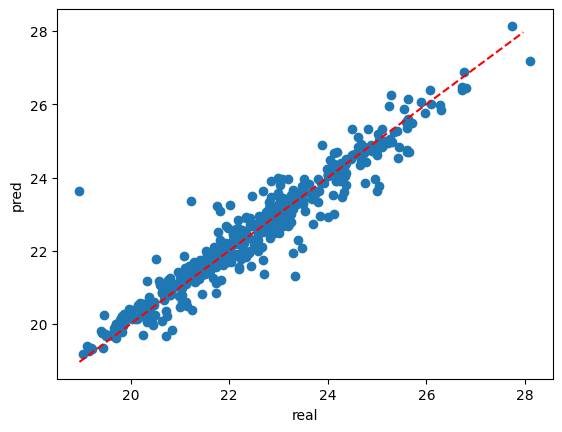

In [24]:
plt.scatter(real,pred)
plt.plot(np.arange(min,max),np.arange(min,max), color='red', linestyle='--')
plt.xlabel('real')
plt.ylabel('pred')

Text(0, 0.5, 'count')

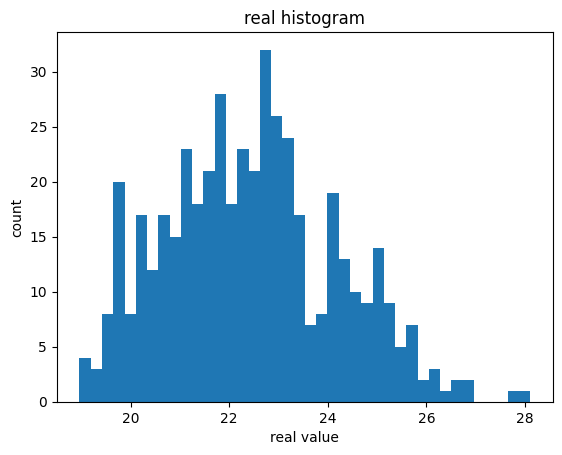

In [25]:
plt.hist(real, bins=40)
plt.title('real histogram')
plt.xlabel('real value')
plt.ylabel('count')

In [26]:
r2 = r2_score(real,pred)

In [27]:
r2

0.9232805536219283

In [28]:
import pickle
filename = 'model'
pickle.dump(model,open('./LR/'+filename,'wb'))

In [29]:
import joblib

In [30]:
file_name = 'scaler_x'
joblib.dump(scaler_x,'./LR/'+file_name)

['./LR/scaler_x']

In [31]:
file_name = 'scaler_y'
joblib.dump(scaler_y,'./LR/'+file_name)

['./LR/scaler_y']